In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Convolution2D 
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

from keras.preprocessing.image import ImageDataGenerator


In [2]:
train_datagen = ImageDataGenerator(
    rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
    "/content/drive/MyDrive/xray_dataset_covid19/train",
    target_size=(64,64),
    batch_size=32,
    class_mode="binary"
)
test_set = test_datagen.flow_from_directory(
    "/content/drive/MyDrive/xray_dataset_covid19/test",
    target_size=(64,64),
    batch_size=32,
    class_mode="binary"
)

Found 148 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [5]:
model = Sequential()

model.add(Convolution2D(32,(3,3),activation="relu",input_shape=(64,64,3)))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(32,(3,3),activation="relu"))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(32,(3,3),activation="relu"))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(units=128,activation ="relu"))

model.add(Dense(units=1,activation="sigmoid"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 32)        

In [6]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])


In [7]:
history = model.fit(
            training_set,
            epochs=40,
            validation_data=test_set,
            validation_steps=800
      )

Epoch 1/40
5/5 [==============================] - ETA: 0s - loss: 0.7014 - accuracy: 0.5270

5/5 [==============================] - 9s 2s/step - loss: 0.7014 - accuracy: 0.5270 - val_loss: 0.6641 - val_accuracy: 0.5000
Epoch 2/40
5/5 [==============================] - 6s 1s/step - loss: 0.6588 - accuracy: 0.5135
Epoch 3/40
5/5 [==============================] - 6s 1s/step - loss: 0.6229 - accuracy: 0.6757
Epoch 4/40
5/5 [==============================] - 7s 1s/step - loss: 0.5245 - accuracy: 0.8176
Epoch 5/40
5/5 [==============================] - 6s 1s/step - loss: 0.4230 - accuracy: 0.8041
Epoch 6/40
5/5 [==============================] - 6s 1s/step - loss: 0.3614 - accuracy: 0.8243
Epoch 7/40
5/5 [==============================] - 6s 1s/step - loss: 0.2684 - accuracy: 0.8919
Epoch 8/40
5/5 [==============================] - 6s 1s/step - loss: 0.3438 - accuracy: 0.8649
Epoch 9/40
5/5 [==============================] - 6s 1s/step - loss: 0.3116 - accuracy: 0.8378
Epoch 10/40
5/5 [==============================] - 6s 1s/step - loss: 0.2721 - accuracy: 0.8851
Epoch 11/40
5/5 [=

2/2 - 2s - loss: 0.1012 - accuracy: 0.9500 - 2s/epoch - 1s/step
0.949999988079071


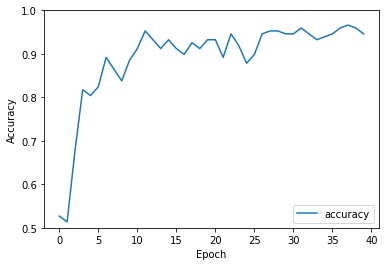

In [25]:
# model evaluation
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_set, verbose=2)
print('test accuracy = ', test_acc)

# We used CNN for x-ray chest dataset classification, and it worked well we can improve performance by increasing the number of epochs.